
**Estadística para Ciencia de los Datos**
###Tarea #4 


Juan Pablo Fernandez Delgado

**Punto #1**

In [0]:
#1)
# media mu = 1
# varianza sigma = 1.0
#n = 100






1) Se denota que $X_i$ el tiempo de servicio de un cliente $i$, entonces se quiere calcular:


\begin{equation}
P\left(\overline{x}≤\dfrac{120}{100}\right)=P\left(\overline{x}≤1.20\right)
\end{equation}



---



Como el tamano de la muestra es grande, el teorema del limite central dice que  $\overline{X}$ Y esta distribuido normalmente en forma aproximada con  $\mu=1.5$ y $\sigma_{\overline{x}}^2 = \sigma^2/n=1.0/100$


Podemos entonces, calcular el valor $Z$ para nuestro punto de interés en la distribución:

$Z=\frac{1.20-1.50}{\sqrt{1/100}}=3$

y obtener la probabilidad $p(Z≤3)$




In [3]:
# Se calcula en scipy
import scipy.stats as st
1-st.norm.cdf(3)

0.0013498980316301035

$p(Z≤3)=0.0013$ tan solo hay un $0.013$% de probabilidad.


La probabilidad de que 100 clientes puedan ser atendidos en menos de 2 horas es aproximadamente 0.0013. Entoces se dice que atender a 100 clientes en menos de 2 horas es practicamente imposible.

**Punto #2**

In [0]:
# lectura de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from numbers import Number
import math
import torch
from torch.distributions import Exponential
from torch.distributions import Uniform
from torch.distributions import Normal
from torch.distributions.exp_family import ExponentialFamily
from torch.distributions.utils import broadcast_all

In [0]:
# lectura del dataset
data= pd.read_csv("https://raw.githubusercontent.com/jpablofdez/DataScience/master/Estadistica/Tareas/Tarea4/MYOPIA.csv", sep=';')

In [6]:
data.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [0]:
def MostrarDistribucion(datos,columna,binPlot=10):
  plt.figure()
  n, bins, patches = plt.hist(datos,density=True,bins=binPlot)
  plt.ylabel("Probability")
  plt.title("Distribución de Columna: "+columna)
  plt.show()

def MuestrasColumna(datosColumna,n,totalMuestras,useSeed=False,seedAdd=0):
  muestras = []
  medias = []
  for i in range(totalMuestras):
    if(useSeed):
      np.random.seed(i+seedAdd)
    muestra = np.random.choice(datosColumna, n)
    muestras.append(muestra)
    media = np.average(muestra)
    medias.append(media)
  return(muestras,medias)

def MostrarColumna(mediasColumna,columna):
  media = round(np.average(mediasColumna),3)
  print("Media Muestral:",media)
  print("\n")
  plt.figure()
  plt.hist(mediasColumna)
  plt.title("Distribución de Muetras de Columna: "+columna)
  plt.axvline(media,linewidth=1, color='r')
  plt.show()
  
def ErrorBarColumna(mediasColumna,muGeneral,error):
  plt.figure()
  plt.errorbar(np.arange(len(mediasColumna))+1,mediasColumna, yerr=error, ls='',
                            elinewidth=1, capsize=5)
  plt.scatter(np.arange(len(mediasColumna))+1,mediasColumna,s=8)
  plt.axhline(muGeneral, color='r',lw=1,label="u")
  plt.show()

  
def ObtenerMuestra(datos,n,seed=10):
  np.random.seed(seed)
  muestra = np.random.choice(datos, n)
  xbar = np.average(muestra)
  print("Media de la muestra (x barra):",round(xbar,3))
  return xbar

def IntervalosConfianza(mu,sigma,intervalo,n,canPrint=True):
  div = sigma / math.sqrt(n)
  zAlpha = stats.norm.ppf((1+intervalo)/2)
  rango = zAlpha*div
  superior = mu + rango
  inferior = mu - rango
  if(canPrint):
    print()
    print("Confianza:",intervalo)
    print("Rango inferior:",inferior)
    print("Rango superior:",superior)
    print()
    print("P("+str(round(inferior,2))+" <= mu <= "+str(round(superior,2))+") = "+str(intervalo))
  return(inferior,superior)

def TamanoN(sigma,error,intervalo):
  zValue = stats.norm.ppf((1+intervalo)/2)
  nResultado = ((zValue * sigma)/error) ** 2
  return math.ceil(nResultado)

def HistogramasResultados(datos,binPlot=10):
  histogram, histogramX = np.histogram(datos,bins=binPlot)
  
  histogram = torch.tensor(histogram,dtype=torch.float64)
  histogramX = torch.tensor(np.delete(histogramX,0),dtype=torch.float64)
  #number of observations
  n = histogram.sum()
  histogramNorm = torch.div(histogram, n)
  #calculate cumulative sum
  cdfEmpirical = torch.cumsum(histogramNorm, dim = 0)
  return(histogramX,cdfEmpirical)

def PlotKS(histogramX,cdfEmpirical,cdfIdeal):
  plt.figure()
  plt.plot(histogramX.numpy(),cdfEmpirical.numpy(),label="Empirico")
  plt.plot(histogramX.numpy(),cdfIdeal.numpy(),label="Ideal",color="red")
  plt.ylabel("Probability")
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

def ResultadoKS(dn,kolDistValue,n):
  print(str(dn)+" < ("+str(kolDistValue)+" / SQRT("+str(n)+") = "+str(kolDistValue / math.sqrt(n))+") is "+str(dn < (kolDistValue/ math.sqrt(n))))
  
  
def CompararDistribuciones(datos,pdfArray,binPlot=10):
  plt.figure()
  n, bins, patches = plt.hist(datosColumna,density=True,label="Distribución Datos",bins=binPlot)
  x,y,titulo,leyenda = pdfArray
  plt.plot(x,y,color='red',label=leyenda)
  plt.ylabel('Probabilidad')
  plt.title("Histograma Datos vs "+titulo)
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()
  
def KSNormal(datos, meanHist, stdHist, binPlot=10,kolDistValue=1.3581):
  histogramX,cdfEmpirical = HistogramasResultados(datos,binPlot)
  #Create ideal CDF
  normalDensity = Normal(meanHist, stdHist)
  cdfNormalIdeal = normalDensity.cdf(histogramX)
  #Compare the empirical and ideal distributions
  difference = torch.abs(cdfNormalIdeal - cdfEmpirical)
  dn = torch.max(difference)
  PlotKS(histogramX,cdfEmpirical,cdfNormalIdeal)
  ResultadoKS(dn.item(),kolDistValue,len(datos))

###Pruebas para la columna **Age**


In [0]:
# Gargamos los datos de la columna Age
age = data['AGE']


In [9]:
age.describe()

count    618.000000
mean       6.299353
std        0.712950
min        5.000000
25%        6.000000
50%        6.000000
75%        6.000000
max        9.000000
Name: AGE, dtype: float64

In [0]:
sigma = np.std(age)
mu = np.mean(age)

In [12]:
sigma = round(sigma,2)
mu = round(mu,2)
print("Valores de sigma: {} y mu: {}".format(sigma,mu))

Valores de sigma: 0.71 y mu: 6.3


**a)**  Con la totalidad de los datos, calculamos un intervalo de confianza al 95% para la columna AGE.

In [25]:
age.count()

618

In [26]:
n = 618
xbar = ObtenerMuestra(age,n)

Media de la muestra (x barra): 6.303


In [27]:
intervalo = 0.95

IC_Inf,IC_Sup = IntervalosConfianza(mu,sigma,intervalo,n)


Confianza: 0.95
Rango inferior: 6.244022667100308
Rango superior: 6.355977332899692

P(6.24 <= mu <= 6.36) = 0.95


Con intervalo de confianza $$P(6.24\leq\mu\leq6.36) = 0.95$$ se **acepta** la hipótesis ya que la media de la muestra ($\bar{x}=6.30$) se encuentra entre el intervalo

**b)**  Se calcula el mismo intervalo al 95% de confianza solamente con los primeros 25 casos del archivo de datos.

In [28]:
n = 25
xbar = ObtenerMuestra(age,n)

Media de la muestra (x barra): 6.2


In [29]:
intervalo = 0.95

IC_Inf,IC_Sup = IntervalosConfianza(mu,sigma,intervalo,n)


Confianza: 0.95
Rango inferior: 6.0216851141953125
Rango superior: 6.578314885804687

P(6.02 <= mu <= 6.58) = 0.95


Con intervalo de confianza $$P(6.02\leq\mu\leq6.58) = 0.95$$ se **acepta** la hipótesis ya que la media de la muestra ($\bar{x}=6.2$) se encuentra entre el intervalo

###Pruebas para la columna COMPHR


**c)**  Con la totalidad de los datos, calcule un intervalo de confianza al 95% para la columna COMPHR.

In [0]:
comphr = data['COMPHR']

In [0]:
sigma = np.std(comphr)
mu = np.mean(comphr)

In [34]:
round(sigma,2)
round(mu,2)
print("Valores de sigma: {} y mu: {}".format(sigma,mu))

Valores de sigma: 3.054034265024359 y mu: 2.105177993527508


In [39]:
comphr.count()

618

In [40]:
n = 618
xbar = ObtenerMuestra(comphr,n)

Media de la muestra (x barra): 2.129


In [41]:
intervalo = 0.95

IC_Inf,IC_Sup = IntervalosConfianza(mu,sigma,intervalo,n)


Confianza: 0.95
Rango inferior: 1.8643939192453458
Rango superior: 2.3459620678096704

P(1.86 <= mu <= 2.35) = 0.95


Con intervalo de confianza $$P(1.86\leq\mu\leq2.35) = 0.95$$ se **acepta** la hipótesis ya que la media de la muestra ($\bar{x}=2.13$) se encuentra entre el intervalo

**d)**  Calculamos el mismo intervalo al 95% de confianza solamente con los primeros 100 casos del archivo de datos.

In [44]:
n = 100
xbar = ObtenerMuestra(comphr,n)

Media de la muestra (x barra): 2.14


In [45]:
intervalo = 0.95

IC_Inf,IC_Sup = IntervalosConfianza(mu,sigma,intervalo,n)


Confianza: 0.95
Rango inferior: 1.5065982768276083
Rango superior: 2.703757710227408

P(1.51 <= mu <= 2.7) = 0.95


Con intervalo de confianza $$P(1.51\leq\mu\leq2.70) = 0.95$$ se **acepta** la hipótesis ya que la media de la muestra ($\bar{x}=2.14$) se encuentra entre el intervalo

**Punto #3**

Prueba de normalidad de Kolmogorov-Smirnov
Se van a realizar el test de KS con una confianza de  1−α=0.95

Evaluacion grafico COMPHR

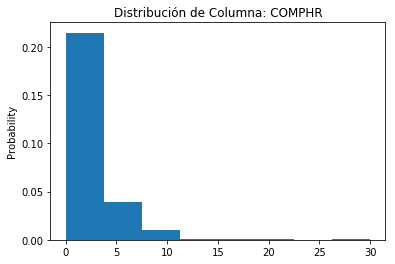

Valores de sigma: 3.05 y mu: 2.11


In [59]:
comphr = data["COMPHR"]


sigma = np.std(comphr)
mu = np.mean(comphr)

sigma = round(sigma,2)
mu = round(mu,2)
MostrarDistribucion(comphr,"COMPHR",8)
print("Valores de sigma: {} y mu: {}".format(sigma,mu))

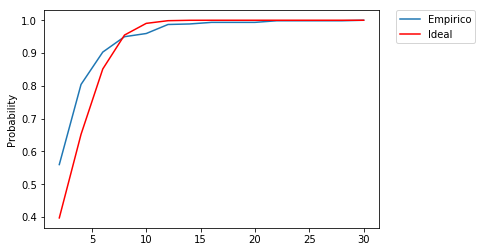

0.16266477911775684 < (1.3581 / SQRT(618) = 0.05463079388748345) is False


In [69]:
KSNormal(comphr,mu,sigma,15)



Al ser falsa la compración podemos decir que se **rechaza** la hipótesis, por lo que los datos no pudieron haber sido generados de una distribución normal con $\mu=2.11$ y $\sigma=3.05$.

Evaluacion grafico SPORTHR

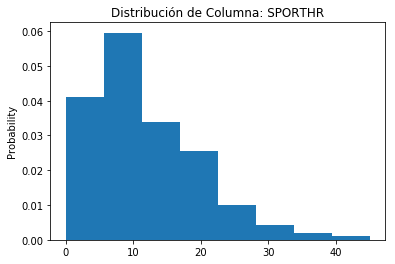

Valores de sigma: 7.96 y mu: 11.95


In [63]:
sporthr = data["SPORTHR"]


sigma = np.std(sporthr)
mu = np.mean(sporthr)

sigma = round(sigma,2)
mu = round(mu,2)
MostrarDistribucion(sporthr,"SPORTHR",8)
print("Valores de sigma: {} y mu: {}".format(sigma,mu))

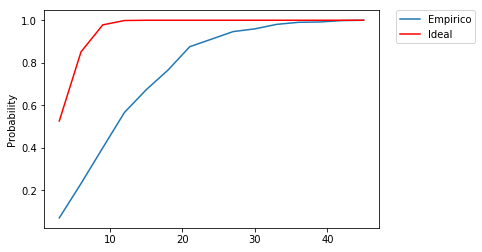

0.6199826169628408 < (1.3581 / SQRT(618) = 0.05463079388748345) is False


In [70]:
KSNormal(sporthr,mu,sigma, 15)

Al ser falsa la compración podemos decir que se **rechaza** la hipótesis, por lo que los datos no pudieron haber sido generados de una distribución normal con $\mu=11.95$ y $\sigma=7.96$.

Evaluacion grafico READHR

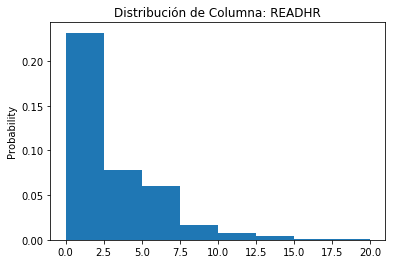

Valores de sigma: 3.07 y mu: 2.8


In [65]:
readhr = data["READHR"]


sigma = np.std(readhr)
mu = np.mean(readhr)

sigma = round(sigma,2)
mu = round(mu,2)
MostrarDistribucion(readhr,"READHR",8)
print("Valores de sigma: {} y mu: {}".format(sigma,mu))

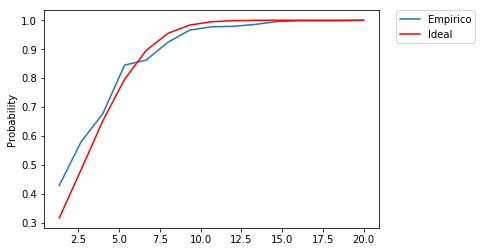

0.11238552152883424 < (1.3581 / SQRT(618) = 0.05463079388748345) is False


In [71]:
KSNormal(readhr,mu,sigma,15)

Al ser falsa la compración podemos decir que se **rechaza** la hipótesis, por lo que los datos no pudieron haber sido generados de una distribución normal con $\mu=2.8$ y $\sigma=3.07$.